In [1]:
import netCDF4
import numpy as np
import j3
import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

In [2]:
# directory path to downloaded netCDF
data_path='../../../J3_MON'

# variable name
var='NHF'
ver='V1.0'
tr='MONTHLY'
sr='HR'
yr='2002'

fname = j3.misc.filename(var,tr,sr,ver,yr)
file=data_path + '/' + fname
print(file)

# open netCDF file
ncf = netCDF4.Dataset(file, 'r')

# read variables
nhf = ncf.variables[var][:]
lon = ncf.variables['longitude'][:]
lat = ncf.variables['latitude'][:]
time = ncf.variables['time'][:]

../../../J3_MON/J-OFURO3_NHF_V1.0_MONTHLY_HR_2002.nc


In [3]:
map = bm.Basemap(projection = 'cyl', llcrnrlat = -90.0, llcrnrlon = 0, urcrnrlat = 90.0, urcrnrlon = 360)

In [4]:
map.drawparallels(np.array([-20, -10, 0, 10 ,20]), labels=[0,0,0,1])
map.drawmeridians(np.array([-180, -90, 0, 90, 180]), labels = [0,0,0,1])

{0: ([<matplotlib.lines.Line2D at 0x121147a58>],
  [<matplotlib.text.Text at 0x1211612e8>]),
 90: ([<matplotlib.lines.Line2D at 0x1211532b0>],
  [<matplotlib.text.Text at 0x1210cbc18>]),
 180: ([<matplotlib.lines.Line2D at 0x121153a90>],
  [<matplotlib.text.Text at 0x1210afb70>]),
 270: ([<matplotlib.lines.Line2D at 0x12115c2b0>],
  [<matplotlib.text.Text at 0x1210a4160>]),
 360: ([<matplotlib.lines.Line2D at 0x12115ca90>],
  [<matplotlib.text.Text at 0x121112eb8>])}

In [5]:
map.drawcoastlines()

In [6]:
ave = np.ma.average(nhf,axis=0)

In [7]:
ave.shape

(720, 1440)

In [8]:
ave

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = 1e+20)

In [9]:
clevs = np.linspace(-200,200,50)

In [10]:
clevs

array([-200.        , -191.83673469, -183.67346939, -175.51020408,
       -167.34693878, -159.18367347, -151.02040816, -142.85714286,
       -134.69387755, -126.53061224, -118.36734694, -110.20408163,
       -102.04081633,  -93.87755102,  -85.71428571,  -77.55102041,
        -69.3877551 ,  -61.2244898 ,  -53.06122449,  -44.89795918,
        -36.73469388,  -28.57142857,  -20.40816327,  -12.24489796,
         -4.08163265,    4.08163265,   12.24489796,   20.40816327,
         28.57142857,   36.73469388,   44.89795918,   53.06122449,
         61.2244898 ,   69.3877551 ,   77.55102041,   85.71428571,
         93.87755102,  102.04081633,  110.20408163,  118.36734694,
        126.53061224,  134.69387755,  142.85714286,  151.02040816,
        159.18367347,  167.34693878,  175.51020408,  183.67346939,
        191.83673469,  200.        ])

In [11]:
mymap = plt.contour(lon, lat, ave, 15, colors = 'k')
mymap2 = plt.contourf(lon, lat, ave, clevs, cmap=plt.cm.jet)

In [12]:
plt.colorbar(mymap2, orientation = 'horizontal')

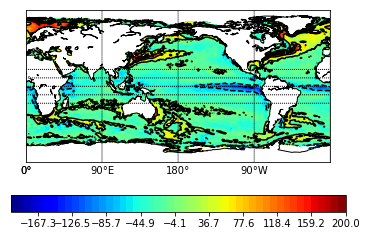

In [13]:
plt.show()